In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sbpy.photometry import HG1G2

import sys
import ssptools

from astropy.coordinates import SkyCoord
import astropy.units as u

In [2]:
# Get ephemerides
ephemcc = ssptools.ephemcc(22, '2023-01-01', nbd=200, step='10d', observer='010' )
ephxyz = ssptools.ephemcc(22, '2023-01-01', nbd=200, step='10d', tcoor=2, rplane='2', observer='010' )

In [3]:
# Fix parameters
g1 = 0.05
g2 = 0.5

ra0 = np.radians(195)
dec0 = np.radians(-2)
R = 0.8

In [4]:
# Dist function
f = 5*np.log10( ephemcc.Dobs * ephemcc.Dhelio ) 

In [5]:
# Phase function
ph = np.radians( ephemcc.Phase )

arg = g1 * HG1G2._phi1(ph) + g2 * HG1G2._phi2(ph) + (1 - g1 - g2) * HG1G2._phi3(ph)
g = -2.5 * np.log10(arg)

In [6]:
# Spin function
coords = SkyCoord( ephemcc.RA, ephemcc.DEC, unit=(u.hourangle, u.deg) )
ra = coords.ra.radian
dec = coords.dec.radian


cosL = np.sin(dec)*np.sin(dec0) + np.cos(dec)*np.cos(dec0)*np.cos(ra-ra0)

s = 2.5*np.log10( 1 - (1-R)*np.abs(cosL) )

Text(0, 0.5, 's($\\alpha,\\delta$)')

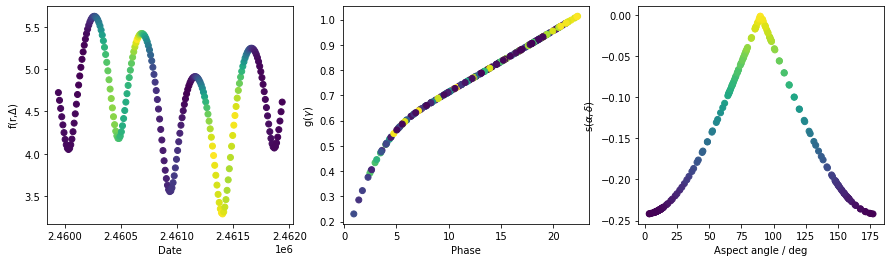

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(15,4))

# Date
ax[0].scatter( ephemcc.Date, f, c=s )
ax[0].set_xlabel('Date')
ax[0].set_ylabel('f(r,$\Delta$)')

# Phase
ax[1].scatter( ephemcc.Phase, g, c=s )
ax[1].set_xlabel('Phase')
ax[1].set_ylabel('g($\gamma$)')

# Spin
# ax[2].scatter( cosL, s, c=s )
# ax[2].set_xlabel('cos(aspect angle)')
# ax[2].set_ylabel('s($\\alpha,\delta$)')
ax[2].scatter( np.degrees(np.arccos(cosL)), s, c=s )
ax[2].set_xlabel('Aspect angle / deg')
ax[2].set_ylabel('s($\\alpha,\delta$)')


In [8]:
# Build apparent magnitude
H = 6.6
m = H + f + g + s 

Text(0, 0.5, 's($\\alpha,\\delta$)')

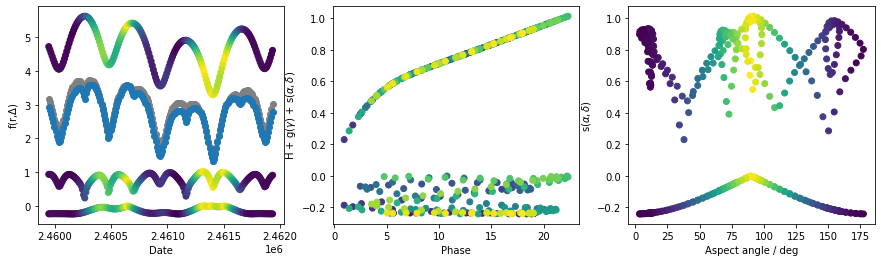

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(15,4))

# Date
ax[0].scatter( ephemcc.Date, f, c=s )
ax[0].scatter( ephemcc.Date, g, c=s )
ax[0].scatter( ephemcc.Date, s, c=s )
ax[0].scatter( ephemcc.Date, f+g-2.5, color='grey' )
ax[0].scatter( ephemcc.Date, f+g+s-2.5 )
ax[0].set_xlabel('Date')
ax[0].set_ylabel('f(r,$\Delta$)')

# Phase
# ax[1].scatter( ephemcc.Phase, f, c=s )
ax[1].scatter( ephemcc.Phase, g, c=ephemcc.Date )
ax[1].scatter( ephemcc.Phase, s, c=ephemcc.Date )
# ax[1].plot( ephemcc.Phase, H+g+s, zorder=-1, color='gray' )
# ax[1].scatter( ephemcc.Phase, H+g+s , c=s )
ax[1].set_xlabel('Phase')
ax[1].set_ylabel('H + g($\gamma$) + s($\\alpha,\delta$)')

# # Celestial sphere
ax[2].scatter( np.degrees(np.arccos(cosL)), s, c=s )
ax[2].scatter( np.degrees(np.arccos(cosL)), g, c=s )
ax[2].set_xlabel('Aspect angle / deg')
ax[2].set_ylabel('s($\\alpha,\delta$)')

# ax[2].scatter( np.degrees(ra), np.degrees(dec), c=s )
# ax[2].scatter( np.degrees(ra0), np.degrees(dec0), color='orange', marker='s' )
# ax[2].set_xlabel('$\\alpha$ / deg')
# ax[2].set_ylabel('$\delta$ / deg')2

In [10]:
print(' f: ', np.max(f) - np.min(f))
print(' g: ', np.max(g) - np.min(g))
print(' s: ', np.max(s) - np.min(s))

 f:  2.3330480792613155
 g:  0.7831593872050435
 s:  0.24068364782123264


Text(0, 0.5, '$\\delta$ / deg')

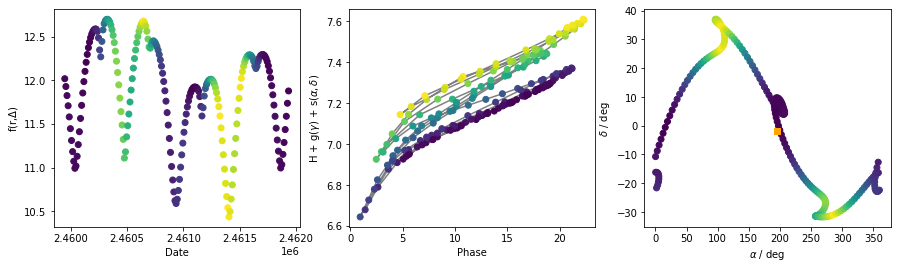

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(15,4))

# Date
ax[0].scatter( ephemcc.Date, m, c=s )
ax[0].set_xlabel('Date')
ax[0].set_ylabel('f(r,$\Delta$)')

# Phase
ax[1].plot( ephemcc.Phase, H+g+s, zorder=-1, color='gray' )
ax[1].scatter( ephemcc.Phase, H+g+s , c=s )
ax[1].set_xlabel('Phase')
ax[1].set_ylabel('H + g($\gamma$) + s($\\alpha,\delta$)')

# Celestial sphere
ax[2].scatter( np.degrees(ra), np.degrees(dec), c=s )
ax[2].scatter( np.degrees(ra0), np.degrees(dec0), color='orange', marker='s' )
ax[2].set_xlabel('$\\alpha$ / deg')
ax[2].set_ylabel('$\delta$ / deg')

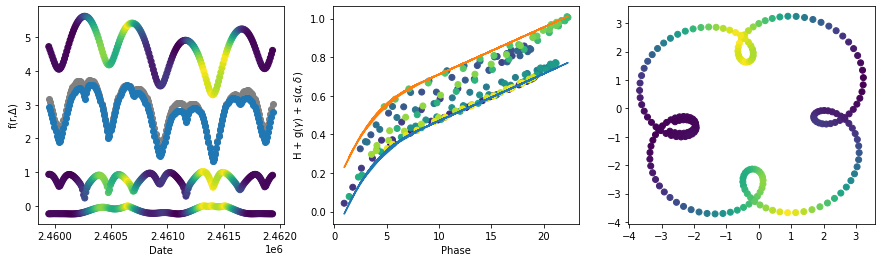

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(15,4))

# Date
ax[0].scatter( ephemcc.Date, f, c=s )
ax[0].scatter( ephemcc.Date, g, c=s )
ax[0].scatter( ephemcc.Date, s, c=s )
ax[0].scatter( ephemcc.Date, f+g-2.5, color='grey' )
ax[0].scatter( ephemcc.Date, f+g+s-2.5 )
ax[0].set_xlabel('Date')
ax[0].set_ylabel('f(r,$\Delta$)')

# Phase
# ax[1].scatter( ephemcc.Phase, f, c=s )
ax[1].plot( ephemcc.Phase, g+np.min(s) )
ax[1].plot( ephemcc.Phase, g+np.max(s) )
ax[1].scatter( ephemcc.Phase, g+s, c=ephemcc.Date )
ax[1].set_xlabel('Phase')
ax[1].set_ylabel('H + g($\gamma$) + s($\\alpha,\delta$)')

# # Celestial sphere
ax[2].scatter( ephxyz.px, ephxyz.py, c=s )
# ax[2].scatter( np.degrees(np.arccos(cosL)), g, c=s )
# ax[2].set_xlabel('Aspect angle / deg')
# ax[2].set_ylabel('s($\\alpha,\delta$)')

# ax[2].scatter( np.degrees(ra), np.degrees(dec), c=s )
# ax[2].scatter( np.degrees(ra0), np.degrees(dec0), color='orange', marker='s' )
# ax[2].set_xlabel('$\\alpha$ / deg')
# ax[2].set_ylabel('$\delta$ / deg')2

In [13]:
ephxyz

,Date,px,py,pz,Dobs,Dhelio,Phase,Elong.,VMag,vx,vy,vz,RV
0,2459945.5,-2.746284,-0.805511,0.665620,2.938362,2.995983,19.044712,83.790477,12.512236,0.015784,-0.006537,-0.000618,-22.682183
1,2459955.5,-2.592252,-0.856666,0.659304,2.808617,3.005148,19.092460,91.819391,12.422346,0.015298,-0.003582,-0.000704,-22.841510
2,2459965.5,-2.445447,-0.879287,0.652258,2.679328,3.014181,18.740800,100.245836,12.315152,0.014306,-0.000787,-0.000786,-22.492826
3,2459975.5,-2.310893,-0.875475,0.644515,2.553836,3.023072,17.935208,109.098215,12.191066,0.012820,0.001729,-0.000865,-21.490540
4,2459985.5,-2.192977,-0.848495,0.636077,2.435916,3.031814,16.638592,118.378033,12.051519,0.010945,0.003885,-0.000943,-19.830000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2461895.5,-2.118062,-0.434087,0.520488,2.223854,3.107495,10.601401,145.460299,11.688579,-0.009223,0.003659,-0.001508,13.362234
196,2461905.5,-2.217291,-0.408659,0.505668,2.310645,3.114402,13.115379,135.634200,11.871829,-0.010877,0.001587,-0.001546,17.000487
197,2461915.5,-2.331062,-0.405123,0.490354,2.416282,3.121081,15.218097,126.005614,12.048387,-0.012154,-0.000769,-0.001584,19.969419
198,2461925.5,-2.455255,-0.426047,0.474558,2.536729,3.127527,16.832775,116.765231,12.213603,-0.012975,-0.003341,-0.001617,22.192077
